In [19]:
# Importing modules
import pandas as pd
# Read data into papers
papers = pd.read_csv('./PTEN-Boticario.csv', index_col=[0])
# Print head
papers.head()

,pros,contras,rates,contras_en,pros_en
0,"Cultura, Aprendizado, Benefícios, Carreira e c...",Não há contras de trabalhar nesta empresa,"5,0",There are no cons of working for this company.,"Culture, Learning, Benefits, Career and growth"
1,"Cultura, preocupação com o funcionário, tecnol...",Não consegui encontrar nada relevante para fal...,"5,0",I couldn't find anything relevant to talk abou...,"Culture, employee concern, technology"
2,Alta participação de lucros alta e acompanhame...,Não tenho pontos contra o GB,"5,0",I have no points against GB,High profit sharing and employee performance m...
3,"Diversidade, home office, PLR, cultura inclusi...",Ciclo de reconhecimento que acontece de 6 em 6...,"5,0",Recognition cycle that happens every 6 months,"Diversity, home office, PLR, inclusive culture..."
4,"Valores, se importam com pessoas, ótimos benef...",Vaga hibrida e distancia (Curitiba).,"5,0",Hybrid vacancy and distance (Curitiba).,"Values, care about people, great benefits."


In [20]:
# Remove the columns
papers = papers.drop(columns=['pros', 'contras', 'rates'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,contras_en,pros_en
1900,"There are no negative points, there were occas...","Work environment, opportunity for growth and g..."
13,Lack of synergy for deliveries with multidisci...,"Work environment, benefits, investment in prof..."
1623,"In my unit specifically, there are more concer...","Excellent place to work, company concerned wit..."
1821,"everything depends on our effort, grated and s...","a company very well regarded in the market, an..."
1808,The company's culture means that some processe...,Very relational company and people are highly ...


In [21]:
texts = {'text':[]}
for text in papers['contras_en']:
    texts['text'].append(text)

for text in papers['pros_en']:
    texts['text'].append(text)

papers = pd.DataFrame( texts )

papers.head()

,text
0,"There are no negative points, there were occas..."
1,Lack of synergy for deliveries with multidisci...
2,"In my unit specifically, there are more concer..."
3,"everything depends on our effort, grated and s..."
4,The company's culture means that some processe...


In [22]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
C:\Users\eduar\AppData\Local\Temp\ipykernel_10040\2748380193.py:5: DeprecationWarning: invalid escape sequence '\.'
  papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    there are no negative points there were occasi...
1    lack of synergy for deliveries with multidisci...
2    in my unit specifically there are more concern...
3    everything depends on our effort grated and su...
4    the company's culture means that some processe...
Name: paper_text_processed, dtype: object

c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and wi

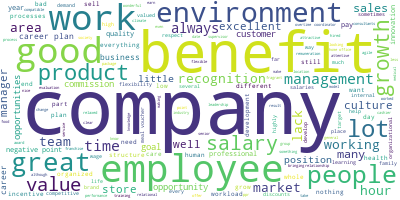

In [23]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [24]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['negative', 'points', 'occasional', 'problems', 'managers']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [26]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"work" + 0.017*"company" + 0.017*"benefits" + 0.014*"good" + '
  '0.014*"great" + 0.012*"employees" + 0.012*"lot" + 0.010*"environment" + '
  '0.008*"salary" + 0.008*"recognition"'),
 (1,
  '0.021*"company" + 0.009*"lot" + 0.009*"good" + 0.008*"market" + '
  '0.008*"management" + 0.008*"lack" + 0.008*"salary" + 0.007*"managers" + '
  '0.007*"little" + 0.006*"processes"'),
 (2,
  '0.047*"company" + 0.019*"benefits" + 0.013*"good" + 0.013*"work" + '
  '0.013*"employees" + 0.012*"environment" + 0.012*"people" + 0.009*"great" + '
  '0.008*"values" + 0.007*"career"')]


In [27]:
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('../Dashboard/assets/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '../Dashboard/assets/Boticario_TM'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.032623  0.048870       1        1  38.429311
0     -0.028489 -0.051125       2        1  31.049421
1      0.061113  0.002255       3        1  30.521267, topic_info=            Term       Freq      Total Category  logprob  loglift
191         work  21.000000  21.000000  Default  30.0000  30.0000
282     benefits  25.000000  25.000000  Default  29.0000  29.0000
23       company  58.000000  58.000000  Default  28.0000  28.0000
33           lot  14.000000  14.000000  Default  27.0000  27.0000
30         great  16.000000  16.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
220       people   3.281686  16.000705   Topic3  -5.1917  -0.3975
126  environment   3.265255  18.676491   Topic3  -5.1967  -0.5572
1       negative   2.446299   6.274549   Topic3  -5.4855   0.2448
185       values   2.587145   9.186371   Topic3  -5.4295  -0.0804
178    employees   2.633431  19.301294   Topic3  -5.4118  -0.8051

[215 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
322       3  0.474755    addition
194       3  0.712064  aggressive
541       3  0.707530       agile
145       1  0.312386      always
145       2  0.416515      always
...     ...       ...         ...
116       2  0.488371    workload
116       3  0.244186    workload
843       1  0.948804       works
175       2  0.496047       worth
463       2  0.992510        year

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])